## SVM - Support Vector Machines

In [26]:
from sklearn.svm import SVC   # SVM para classificação
from sklearn.svm import SVR   # SVM para regressão

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

### Dataset 01: Breast Cancer
Para esse dataset vamos utilizar o SVM de classificação, predizendo se há ou não presença de cancer utilizando características como raio, área, textura, perímetro, etc.

In [2]:
# Importando os dados
from sklearn.datasets import load_breast_cancer

# Instanciando o dataset
cancer = load_breast_cancer()

# Separando entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [3]:
# Instanciando o classificador
svc = SVC()

# Treinando o modelo
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
# Verificando o Score
print("Score de treino: ", svc.score(X_train, y_train))
print("Score de teste: ", svc.score(X_test, y_test))

Score de treino:  1.0
Score de teste:  0.6293706293706294


Olhando os scores vemos que há uma grande diferença de resultado entre o treino e teste. Conforme citado na parte teórica, o SVM é sensível à escala e isso pode estar afetando o modelo. Vamos, a seguir, verificar os valores mínimos e máximos de cada uma das fetaures e verificar se estão numa mesma escala.

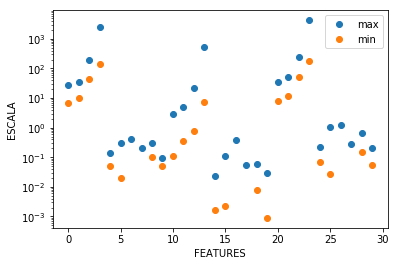

In [5]:
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.legend(loc="best")
plt.xlabel("FEATURES")
plt.ylabel("ESCALA")
plt.yscale("log")

Como pode ser visto acima, as features estão em escalas diferentes. Para corrigir esse problema e melhorar a performance do modelo, vamos normalizar os dados.

Text(0,0.5,'ESCALA')

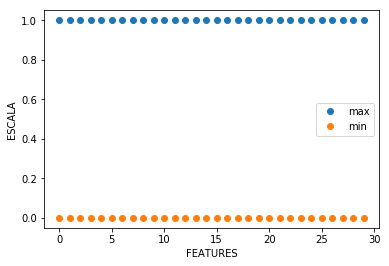

In [6]:
# Instanciando o modelo MinMax
c_scaler = MinMaxScaler()

# Aplicando o MinMax no dataset inteiro
X = cancer.data
X_norm = c_scaler.fit_transform(X)

# Plotando novamente o gráfico com a variação máxima e mínima de cada uma das 30 features
plt.plot(X_norm.max(axis=0), 'o', label="max")
plt.plot(X_norm.min(axis=0), 'o', label="min")
plt.legend(loc="best")
plt.xlabel("FEATURES")
plt.ylabel("ESCALA")

Como podemos ver acima, cada uma das fetaures varia entre 1 e 0 após a normalização. Vamos então aplicar os dados normaizados novamente ao modelo.

In [7]:
# Dividindo entre treino e teste
X_Ntrain, X_Ntest, y_train, y_test = train_test_split(X_norm, cancer.target, random_state=0)

# Treinando o modelo
svc.fit(X_Ntrain, y_train)

# Verificando o score
print("Score de treino: ", svc.score(X_Ntrain, y_train))
print("Score de teste: ", svc.score(X_Ntest, y_test))

Score de treino:  0.9483568075117371
Score de teste:  0.958041958041958


Houve uma melhoria significativa após a normalização dos dados! Também podemos alterar os parâmetro para buscar um resultado ainda melhor.

In [8]:
parametro = (1, 10, 100, 1000, 10000)

for i in parametro:
    svc = SVC(C=i)
    svc.fit(X_Ntrain, y_train)
    
    print("Score de treino, C=", i, ": ", svc.score(X_Ntrain, y_train))
    print("Score de teste, C=", i, ": ", svc.score(X_Ntest, y_test), chr(10))

Score de treino, C= 1 :  0.9483568075117371
Score de teste, C= 1 :  0.958041958041958 

Score de treino, C= 10 :  0.9765258215962441
Score de teste, C= 10 :  0.958041958041958 

Score de treino, C= 100 :  0.9859154929577465
Score de teste, C= 100 :  0.965034965034965 

Score de treino, C= 1000 :  0.9859154929577465
Score de teste, C= 1000 :  0.972027972027972 

Score de treino, C= 10000 :  0.9953051643192489
Score de teste, C= 10000 :  0.958041958041958 



Conforme podemos ver acima, à medida que vamos aumentando o valor de C, os resultados foram ficando cada vez melhores, porém ao configurarmos C=10000, obtivemos um valor superior nos dados de treino e uma queda nos dados de teste, indicando um overfitting. Com base nos resultados acima, podemos concluir que para esses dados o melhor valor para C está em torno de 1000.

### Dataset 02: Boston house-prices dataset
Para esse dataset vamos utilizar o SVM de regressão, predizendo os valores das casas utilizando características crime percapita, quantidade de quartos, etc.

In [20]:
from sklearn.datasets import load_boston

# Instanciando o dataset
boston = load_boston()

In [27]:
b_Xscalled = StandardScaler().fit_transform(boston.data)

In [28]:
b_yscalled = StandardScaler().fit_transform(boston.target)

ValueError: Expected 2D array, got 1D array instead:
array=[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 30.3 34.6 34.9 32.9 24.1 42.3 48.5 50.  22.6 24.4 22.5 24.4 20.
 21.7 19.3 22.4 28.1 23.7 25.  23.3 28.7 21.5 23.  26.7 21.7 27.5 30.1
 44.8 50.  37.6 31.6 46.7 31.5 24.3 31.7 41.7 48.3 29.  24.  25.1 31.5
 23.7 23.3 22.  20.1 22.2 23.7 17.6 18.5 24.3 20.5 24.5 26.2 24.4 24.8
 29.6 42.8 21.9 20.9 44.  50.  36.  30.1 33.8 43.1 48.8 31.  36.5 22.8
 30.7 50.  43.5 20.7 21.1 25.2 24.4 35.2 32.4 32.  33.2 33.1 29.1 35.1
 45.4 35.4 46.  50.  32.2 22.  20.1 23.2 22.3 24.8 28.5 37.3 27.9 23.9
 21.7 28.6 27.1 20.3 22.5 29.  24.8 22.  26.4 33.1 36.1 28.4 33.4 28.2
 22.8 20.3 16.1 22.1 19.4 21.6 23.8 16.2 17.8 19.8 23.1 21.  23.8 23.1
 20.4 18.5 25.  24.6 23.  22.2 19.3 22.6 19.8 17.1 19.4 22.2 20.7 21.1
 19.5 18.5 20.6 19.  18.7 32.7 16.5 23.9 31.2 17.5 17.2 23.1 24.5 26.6
 22.9 24.1 18.6 30.1 18.2 20.6 17.8 21.7 22.7 22.6 25.  19.9 20.8 16.8
 21.9 27.5 21.9 23.1 50.  50.  50.  50.  50.  13.8 13.8 15.  13.9 13.3
 13.1 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 10.2 11.5 15.1 23.2
  9.7 13.8 12.7 13.1 12.5  8.5  5.   6.3  5.6  7.2 12.1  8.3  8.5  5.
 11.9 27.9 17.2 27.5 15.  17.2 17.9 16.3  7.   7.2  7.5 10.4  8.8  8.4
 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9 11.   9.5 14.5 14.1 16.1 14.3
 11.7 13.4  9.6  8.7  8.4 12.8 10.5 17.1 18.4 15.4 10.8 11.8 14.9 12.6
 14.1 13.  13.4 15.2 16.1 17.8 14.9 14.1 12.7 13.5 14.9 20.  16.4 17.7
 19.5 20.2 21.4 19.9 19.  19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3
 16.7 12.  14.6 21.4 23.  23.7 25.  21.8 20.6 21.2 19.1 20.6 15.2  7.
  8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9
 22.  11.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
btrain_X, btest_X, btrain_y, btest_y = train_test_split(boston.data, boston.target)

In [11]:
svr = SVR()

In [12]:
svr.fit(btrain_X, btrain_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
svr.score(btrain_X, btrain_y)

0.1473442166914921

In [14]:
svr.score(btest_X, btest_y)

-0.0135011149269999